## PULL OUT READ DEPTH AND GENE QUALTIRY VALUES

In [63]:
vcf = open('snpeff.vcf', 'r')


snpeff = vcf.readlines() #data save
vcf.close()
read_depths = [] #start read depth list
gene_qual = [] #start gene quality list 
for line in snpeff: 
    if '#' in line: # skip header
        continue
    else:
        line = line.rsplit() #split blank spaces
        fmat = line[9:-1] #save data from last lines
        for sublist in fmat: 
            sub=sublist.split(':') #parse data from subset (last data lines)
            if sub[1] =='.': #skip data if it is empty
                continue
            else: #if not empty save gene quality
                gene_qual.append(float(sub[1]))
            if sub[2] =='.': #skip data if it is empty
                continue
            else:
                read_depths.append(int(sub[2])) #if not save depth data





## PULL OUT Allele freq VALUES

In [64]:
all_freq = [] #make allele freq list
for line in snpeff:  
    if '#' in line: #skip header lines
        continue
    else:
        find = line.find('AF=') #if "AF=" is found in string
        DPLINE = line[find+3:find+10] #take data from 3 characters on 
        DPLINE = DPLINE.split(';')[0].split(',') 
        #parse the ten characters by ";" and save the first index then make a list of list by splitting index by ","
        all_freq.append(DPLINE) #append into a list of lists

        

# Flatten the list

In [65]:
all_freq = sum(all_freq, []) #flatten list of list
all_freq = [float(i) for i in all_freq]  #turn all values into floats


## save predicted mutation data

In [67]:
cat=[] #start a list for predicted mutation data
for line in snpeff:  
    if '#' in line: #skip header
        continue
    else:
        find = line.find('ANN=') #fine "ANN=" and save location on the string it was found
        ann_list=line[find:-1] #save string starting at where ANN= was found
        ann = ann_list.split('\t')[0].split('|') #split by tabs and take the first index and split by |
        effects = ann[1].split('&') 
        # take the first index and split by & fore when there is more than one predicted effect
        cat.append(effects) #append into a list of lists
        

        
#         predict = DPLINE.split(';')[0].split(',')
#         all_freq.append(DPLINE)

# Flatten!

In [68]:
cat = sum(cat, []) #flatten list of list
cat = [i for i in cat] 


# turn list into library; count the library and return

In [69]:
cat_count = {}
cat_count = {x:cat.count(x) for x in cat} #count the number of times a mutation type occurs
print(cat_count)

{'upstream_gene_variant': 16318, 'synonymous_variant': 15607, 'missense_variant': 9370, 'stop_gained': 76, 'splice_region_variant': 62, 'intron_variant': 13, 'stop_lost': 32, 'frameshift_variant': 160, 'disruptive_inframe_deletion': 21, 'downstream_gene_variant': 226, 'disruptive_inframe_insertion': 9, 'conservative_inframe_insertion': 10, 'stop_retained_variant': 28, 'initiator_codon_variant': 1, 'start_lost': 23, 'conservative_inframe_deletion': 6, 'non_coding_transcript_exon_variant': 1, '': 677, 'splice_donor_variant': 1, 'splice_acceptor_variant': 1}


# Make test histograms

Text(0.5, 0, 'Read Depth')

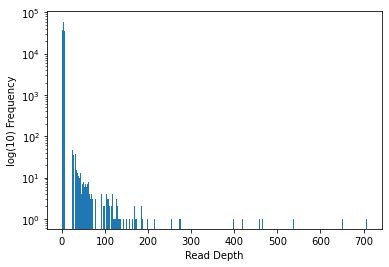

In [13]:

import matplotlib.pyplot as plt
import numpy as np

plt.hist(read_depths, density=False, bins=1000)  # `density=False` would make counts
plt.ylabel('log(10) Frequency')
plt.yscale('log')
plt.xlabel('Read Depth')

Text(0.5, 0, 'Read quality')

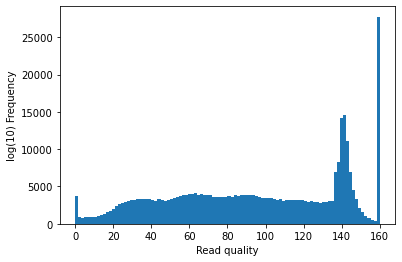

In [12]:

import matplotlib.pyplot as plt
import numpy as np
plt.hist(gene_qual, density=False, bins=100)  # `density=False` would make counts
plt.ylabel('log(10) Frequency')
# plt.yscale('log')
plt.xlabel('Read quality')

In [ ]:
## Hist all_freq

Text(0.5, 0, 'Allele Frequency')

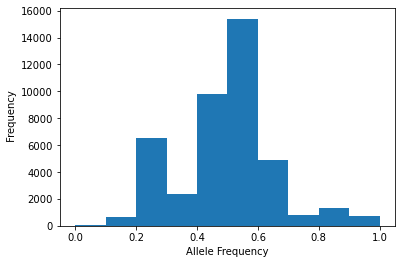

In [14]:

import matplotlib.pyplot as plt
import numpy as np
plt.hist(all_freq, density=False, bins=10)  # `density=False` would make counts
plt.ylabel(' Frequency')
# plt.yscale('log')
plt.xlabel('Allele Frequency')

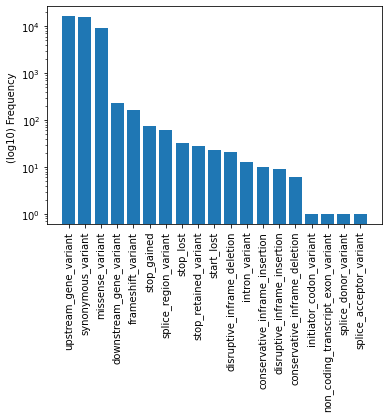

In [15]:
MEOW ={k: cat_count[k] for k in sorted(cat_count, key=cat_count.get, reverse=True)}
if '' in MEOW:
    del MEOW['']
keys = MEOW.keys()
values = MEOW.values()
plt.bar(keys, values)
plt.ylabel('(log10) Frequency ')
plt.xticks(rotation=90)
plt.yscale('log')



### FINAL OUTPUT!

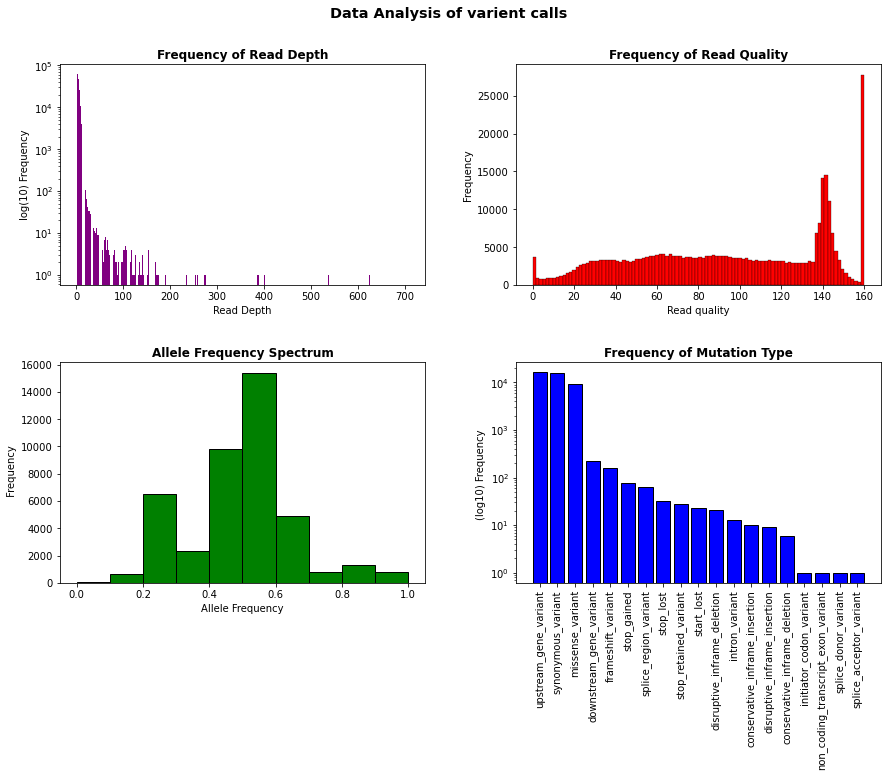

In [61]:


import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.suptitle('Data Analysis of varient calls', x=1, y=2.2, size = 'x-large', weight='heavy')


# READ DEPTH
plt.subplot(221)
plt.hist(read_depths, bins=1000,color=['purple'],)  # `density=False` would make counts
plt.ylabel('log(10) Frequency')
plt.yscale('log')
plt.xlabel('Read Depth')
plt.title('Frequency of Read Depth', weight='heavy')

# QUALITY
plt.subplot(222)
plt.hist(gene_qual, density=False, bins=100, color=['red'],edgecolor='black', linewidth='.3')  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('Read quality')
plt.title('Frequency of Read Quality', weight='heavy')

#ALLELE FREQ
plt.subplot(223)
plt.hist(all_freq, density=False, bins=10,color=['green'],edgecolor='black', linewidth='1')  # `density=False` would make counts
plt.ylabel(' Frequency')
plt.xlabel('Allele Frequency')
plt.title('Allele Frequency Spectrum', weight='heavy')

#MUTATION TYPE
plt.subplot(224)
plt.bar(keys, values, color=['blue'],edgecolor='black', linewidth='1')
plt.ylabel('(log10) Frequency ')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Frequency of Mutation Type', weight='heavy')



plt.subplots_adjust(top=2, bottom=0.2, left=0.10, right=2, hspace=0.35,
                    wspace=0.25)
